<a href="https://colab.research.google.com/github/shivrajanand/PyTorch-Learn/blob/main/PyTorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [788]:
import torch
import numpy as np

**Lecture 2:Tensors**

In [789]:
my_list = [1, 2, 3, 4, 5] #Python list
print(my_list)

[1, 2, 3, 4, 5]


In [790]:
np1 = np.random.rand(3,4) #Numpy array
np1, np1.dtype

(array([[0.32989195, 0.03141719, 0.51236716, 0.99109199],
        [0.01088412, 0.98091503, 0.85185865, 0.41772799],
        [0.91104421, 0.76480975, 0.24606139, 0.90892715]]),
 dtype('float64'))

In [791]:
tensor_2d = torch.randn(3, 4)
tensor_2d, tensor_2d.dtype

(tensor([[ 0.1856, -0.7798, -1.4723, -1.8088],
         [-0.1287,  0.9819, -1.0504, -2.1112],
         [-1.6784, -1.0515,  0.1677, -1.3358]]),
 torch.float32)

In [792]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d, tensor_3d.dtype

(tensor([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]),
 torch.float32)

In [793]:
my_t1 = torch.tensor(np1)
my_t1, my_t1.dtype

(tensor([[0.3299, 0.0314, 0.5124, 0.9911],
         [0.0109, 0.9809, 0.8519, 0.4177],
         [0.9110, 0.7648, 0.2461, 0.9089]], dtype=torch.float64),
 torch.float64)

**Lecture 3: Tensor Operations**

In [794]:
myten1 = torch.arange(10)
myten1

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [795]:
#Reshape and View
myten1 = myten1.reshape(2,5)
myten1

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [796]:
#How to reshape if we dont know number of items
myten2 = torch.arange(10)
myten2

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [797]:
myten2 = myten2.reshape(2,-1)
myten2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [798]:
myten3 = torch.arange(10)
myten3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [799]:
myten4 = myten3.view(2,5)
myten4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

**Math Operations on Tensors**

In [800]:
t1 = torch.tensor([1,2,3,4])
t2 = torch.tensor([5,6,7,8])
t1, t2

(tensor([1, 2, 3, 4]), tensor([5, 6, 7, 8]))

In [801]:
t1+t2 #Addition

tensor([ 6,  8, 10, 12])

In [802]:
torch.add(t1, t2)

tensor([ 6,  8, 10, 12])

In [803]:
t1-t2 #subtraction

tensor([-4, -4, -4, -4])

In [804]:
torch.sub(t1, t2)

tensor([-4, -4, -4, -4])

In [805]:
t1*t2 #multiplication

tensor([ 5, 12, 21, 32])

In [806]:
torch.mul(t1, t2)

tensor([ 5, 12, 21, 32])

In [807]:
t1@t2 #multiply and sum

tensor(70)

In [808]:
t1/t2 #division

tensor([0.2000, 0.3333, 0.4286, 0.5000])

In [809]:
t2/t1

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [810]:
torch.div(t2, t1)

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [811]:
t1%t2 #Remainder

tensor([1, 2, 3, 4])

In [812]:
t2%t1

tensor([0, 0, 1, 0])

In [813]:
t1, t2, t2**t1 #Exponentiation

(tensor([1, 2, 3, 4]), tensor([5, 6, 7, 8]), tensor([   5,   36,  343, 4096]))

In [814]:
torch.pow(t2, t1)

tensor([   5,   36,  343, 4096])

***L5: Create a basic neural Network: Iris  Dataset***

In [815]:
import torch.nn as nn
import torch.nn.functional as F

In [816]:
#Create a model class that inherits nn.Module

class Model(nn.Module):
  #I/P (4 features of flower) -> Hidden Layer 1 -> Hidden Layer 2 -> O/P(3 flower classes)

  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):

    super().__init__() #Instantiate nn.Module

    #fc: fully connected layer
    #out: output layer
    #All layers are set as linear functions
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  #Function to move forward in layers
  def forward(self, x):
    #RELU: Rectified Linear Unit function
    #if output of function < 0 then result is 0 otheriwse the result
    #For any function g(x)=> relu[g(x)] = 0 if {g(x) < 0} else g(x)
    x = F.relu(self.fc1(x))  #Functioning i/p => First Layer{ = x}
    x = F.relu(self.fc2(x))  #Functioning First Layer => Second Layer{ = x}
    x = F.relu(self.out(x))  #Functioning Second Layer => Output{ = x}

    return x

In [817]:
#Pick a seed number for randomization
torch.manual_seed(41)
#Create an instance of model
model = Model()

**L6: Load Data & Training**

In [818]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [819]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"

df = pd.read_csv(url)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
37,4.9,3.1,1.5,0.1,setosa
15,5.7,4.4,1.5,0.4,setosa
98,5.1,2.5,3.0,1.1,versicolor
95,5.7,3.0,4.2,1.2,versicolor


In [820]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [821]:
df['species']= df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

df['species'].unique()

array([0, 1, 2])

In [822]:
from os import X_OK
#train test split

X = df.drop('species', axis=1).values
Y = df['species'].values

In [823]:
from sklearn.model_selection import train_test_split

In [824]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 41)

In [825]:
X_train = torch.tensor(X_train, dtype = torch.float)
X_test = torch.tensor(X_test, dtype = torch.float)
Y_train = torch.tensor(Y_train, dtype = torch.long)
Y_test = torch.tensor(Y_test, dtype = torch.long)

In [826]:
#Set the criteria of model to measure the error
criterion = nn.CrossEntropyLoss()

#Choose an optimizer: Adam Optimizer
#lr = Learning Rate
#If error donot goes down after a few iterations/epochs lr has to be lowered

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [827]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [828]:
#Epoch: One run through all the training data in our network
epochs = 100

losses = []

for i in range(1, epochs+1):
  #Go forwards and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the loss
  loss = criterion(y_pred, Y_train)
  losses.append(loss.detach().numpy()) #loss-tensor => numpy arr

  #print for every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {round(loss.detach().numpy()*100, 2)}')

  #Do backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 10 and loss: 102.27
Epoch: 20 and loss: 86.95
Epoch: 30 and loss: 67.51
Epoch: 40 and loss: 46.93
Epoch: 50 and loss: 28.59
Epoch: 60 and loss: 16.35
Epoch: 70 and loss: 9.73
Epoch: 80 and loss: 6.64
Epoch: 90 and loss: 5.16
Epoch: 100 and loss: 4.34


Text(0.5, 0, 'epochs')

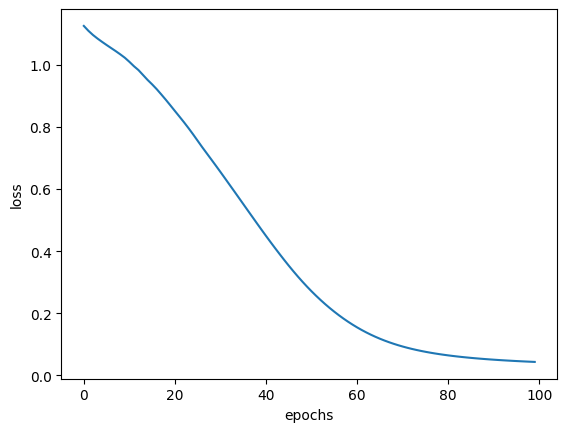

In [829]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epochs')

**L7: Evaluate Test Data Set on Network**

In [830]:
with torch.no_grad(): #Turn off back prop
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, Y_test)

In [831]:
loss*100

#Note that while training last loss encountered was 2.19% but here loss is 12.9% which is a huge difference

tensor(12.9554)

In [832]:
correct = 0

res = []
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    #What type of flower the network is predicting
    # print(f'{i+1} | {str(y_val)} \t {Y_test[i]}')
    res.append([i+1,
                str(y_val),
                Y_test[i],
                y_val.argmax().item() == Y_test[i]])

resdf = pd.DataFrame(res, columns = ['i', 'model prediction', 'predicted flower', 'Status'])

resdf

,i,model prediction,predicted flower,Status
0,1,"tensor([0.0000, 7.4818, 9.9517])",tensor(2),tensor(True)
1,2,"tensor([ 0.0000, 7.7416, 14.4150])",tensor(2),tensor(True)
2,3,"tensor([ 0.0000, 9.1741, 15.2260])",tensor(2),tensor(True)
3,4,"tensor([0.2420, 8.3711, 4.5725])",tensor(1),tensor(True)
4,5,"tensor([ 0.0000, 8.4455, 12.5213])",tensor(2),tensor(True)
5,6,"tensor([1.6580, 8.0895, 2.0248])",tensor(1),tensor(True)
6,7,"tensor([0.0000, 8.1067, 9.3146])",tensor(2),tensor(True)
7,8,"tensor([0.3616, 8.4538, 4.3424])",tensor(1),tensor(True)
8,9,"tensor([ 0.0000, 8.2779, 10.8831])",tensor(2),tensor(True)
9,10,"tensor([ 0.0000, 8.2340, 15.2944])",tensor(2),tensor(True)


In [833]:
resdf.Status.value_counts()

,count
Status,
tensor(True),28
tensor(False),2


**L8: Feed New Data to make predictions**

In [834]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [835]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([8.5490, 3.3566, 0.0000])
0


**L9: Save and Load nn model**

In [836]:
torch.save(model.state_dict(), 'iris_model.pt')

#This dictionary stores all the weights and biases of the trained model
#Models are stored in .pt file

In [837]:
##Loading a model

new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-837-513a6358dcdb>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [838]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)